# Module 4 - Discussion

## Cards & Probability

In [2]:
#imports
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Because cards have two attributes
#we'll play around with making a card class
#that way we can get both suit + value

#make a class called Card
class Card:
    #Card has three values, val (value of card), suit (suit of card), points (numerical point value of a card)
    #we'll use this so that we can loop through and fill out our 52 cards without doing it by hand
    #this allows us to do stuff like Card(8,"Hearts") which makes us an 8 of Hearts
    def __init__(self,val,suit,points):
        self.value = val
        self.suit = suit
        self.points = points
        self.name = val + " of " + suit
    
    #we'll make a method within Card called display
    #this will show us the cards attributes 
    def display(self):
        #{} = replacement fields. it'll pull in order the stuff in .format(val1,val2)
        print("{} of {}".format(self.value, self.suit))

class Deck:
    #Values and Suits
    #List out all the values and suits so we can use them later on
    #We're making deck + card separate in case we need more than one deck or custom values or something
    #initalize with each instance of a deck having a list of cards in the deck and a list of discards
    def __init__(self):
        self.cardsInDeck = []
        self.discardedCards= []

    #this is our builder
    #just double loop to make all 52 cards with ace being the high card
    def standardBuild(self):
        cardValues = ['2','3','4','5','6','7','8','9','10','J','Q','K','A']
        cardPoints = [2,3,4,5,6,7,8,9,10,11,12,13,14]
        cardSuits = ['Hearts','Spades','Clubs','Diamonds']
        for s in cardSuits:
            #use enumerate to get the index so we can loop through and get points by index
            for index,v in enumerate(cardValues):
                self.cardsInDeck.append(Card(v,s,cardPoints[index]))
    #[Card(value, suit, point) for value, suit, point in product(cardValues,cardpoints,cardSuits)]

    #shuffle the deck's list of cards
    #do random.seed() to absolutely make sure it's random
    def shuffleCards(self):
        random.seed()
        random.shuffle(self.cardsInDeck)
        
    #draw one card
    def drawOne(self):
        #pop defaults to last aka top of deck for us.
        #can pop(0) to pop first one
        #be careful though because it shifts the list to the left
        drawncard=self.cardsInDeck.pop()
        #since pop returns the actual thing deleted, we can move it to discards
        self.discardedCards.append(drawncard)
        #we can also return the actual value, it'll come in useful in a second
        return drawncard
    
    def drawX(self,number):
        #empty list to return later
        drawnlist=[]
        #take the number from the func and make it a range
        for i in range(0,number):
            #then for each, do these steps
            drawncard=self.cardsInDeck.pop()
            self.discardedCards.append(drawncard)
            drawnlist.append(drawncard)
        #pass the list back
        return drawnlist



### Scenario 1 - The Basics
Let's see what happens in a 52 card deck, as we draw 1 card at a time

In [ ]:
#initialize deck1 using our constructor 
deck1=Deck()

#now let's build the deck
deck1.standardBuild()

#give it a shuffle
deck1.shuffleCards()

#set count to 1 at the start because people count from 1 not 0
count = 1
#make an empty list called lol for 'list of lists'
lol = []
#get the loop going from 0 to 52
for i in range(0,52):
    #draw one card, we use holder here because we set drawOne to .pop
    #.pop returns the thing being deleted
    holder=deck1.drawOne()
    #now since we returned the actual card object
    #we can get the value, the suit, the points, and the name of it
    #we'll compile it into a list called listholder
    listholder=[count,holder.value,holder.suit,holder.points,holder.name]
    #now we take that listholder, and add it to our lol
    #now every time it loops, it'll add a list containing all the above
    lol.append(listholder)
    #we'll increment our count by 1 so as we loop through, we can make sure we iterate
    count+=1

#now convert that lol to a dataframe
#order matters here, since our data is ordered (lists are ordered)
#we can define 5 distinct columns
#draw_number = the draw # (remember count from the above)
#value,suit,points, and name in order
cardsDF=pd.DataFrame(lol,columns=['Draw_Number','Value','Suit','Points','Name'])

In [ ]:
#uncomment if you need to check
#print(cardsDF.shape)
#cardsDF.head(5)

### Scenario 2 - What is the probability of getting two of the same suit?

Scenario 1 was just getting us familiarized with everything. Let's step it up and do some probabilities

In [ ]:
#initialize deck2 using our constructor 
deck2=Deck()

#now let's build the deck
deck2.standardBuild()

#give it a shuffle
deck2.shuffleCards()

#set count to 1 at the start because people count from 1 not 0
count = 1
#make an empty list called lol for 'list of lists'
lol = []
#we have to switch it up from scenario one because
#we're drawing more than 1 card at a time so we can't just for loop
#we've got to do a while loop
#so while the discardedCards pile is less than 52
while len(deck2.discardedCards) < 52:
    #draw one card, we use holder here because we set drawOne to .pop
    #.pop returns the thing being deleted
    holder=deck2.drawX(2)
    #now since we returned the actual card object
    #we can get the value, the suit, the points, and the name of it
    #we'll compile it into a list called listholder
    for q in holder:
        listholder=[count,q.value,q.suit,q.points,q.name]
        #now we take that listholder, and add it to our lol
        #now every time it loops, it'll add a list containing all the above
        lol.append(listholder)
    #we'll increment our count by 1 so as we loop through, we can make sure we iterate
    count+=1

#now convert that lol to a dataframe
#order matters here, since our data is ordered (lists are ordered)
#we can define 5 distinct columns
#draw_number = the draw # (remember count from the above)
#value,suit,points, and name in order
cardsDF2=pd.DataFrame(lol,columns=['Draw_Number','Value','Suit','Points','Name'])

In [ ]:
#uncomment if you need to check
#business as usual but you'll notice 52,5
#how can we make sure we actually did 26 draws?
#print(cardsDF2.shape)
#print(cardsDF2.head(52))

#to get 26 draws we can just do a unique count and get the length
#pandas dataframes have a method called unique which gives us a list of distinct values
#so we'll use that on the 'Draw_Number' column
#then we take the len of it which gives us 26, and we drew 26 times
#print(len(cardsDF2['Draw_Number'].unique()))

now to do some math and prove the odds match up with our records.

Odds of drawing any 1 suit out of the 4 is 13/52 or 1/4.

Now to get 2 cards of the suit is 13/52 * 12/51 which is 156/2652 or 5.88%

So approximately 5.88% of our draws should be the same suit twice

In [ ]:
#lets group
dfholder1=cardsDF2
#use 1 if double, 0 if not, let's us do math later
dfholder1['check'] = np.where(cardsDF2.duplicated(['Draw_Number', 'Suit'], keep = False), 1, 0)

#above is duped since one draw now has 2 doubles so we're getting a 2x count
#we can groupby to dedupe
dfholder1grouped=dfholder1.groupby(['Draw_Number','Suit'])['check'].sum().reset_index()

#now lets get the counts back again
numdraws=len(dfholder1grouped['Draw_Number'].unique())
dubscount=dfholder1grouped[(dfholder1grouped.check == 2)]['check'].count()
heartsdubs = dfholder1grouped[(dfholder1grouped.check == 2) & (dfholder1grouped.Suit == 'Hearts')]['check'].count()
spadesdubs = dfholder1grouped[(dfholder1grouped.check == 2) & (dfholder1grouped.Suit == 'Spades')]['check'].count()
clubsdubs = dfholder1grouped[(dfholder1grouped.check == 2) & (dfholder1grouped.Suit == 'Clubs')]['check'].count()
diamondsdubs = dfholder1grouped[(dfholder1grouped.check == 2) & (dfholder1grouped.Suit == 'Diamonds')]['check'].count()

In [ ]:
#big print section. could just put this into neat array and then print.
print('overall dub stats')
print('dubs =',dubscount)
print('hearts dubs =',heartsdubs)
print('spades dubs =',spadesdubs)
print('clubs dubs =',clubsdubs)
print('diamonds dubs =',diamondsdubs)
print('draws = ',numdraws)
print('dubs portion = ',format(dubscount/numdraws,'.2%'))
print('hearts dubs portion = ',format(heartsdubs/numdraws,'.2%'))
print('spades dubs portion = ',format(spadesdubs/numdraws,'.2%'))
print('clubs dubs portion = ',format(clubsdubs/numdraws,'.2%'))
print('diamonds dubs portion = ',format(diamondsdubs/numdraws,'.2%'))

### Scenario 2.1 - 10,000 decks

In [ ]:
#set count to 1 at the start because people count from 1 not 0
count = 1
#anothercounter to count the deck we're in
deckcount=1
#make an empty list called lol for 'list of lists'
lol = []

#switching from scenario 2 base, let's loop and make 10000 decks at once so we can simulate drawing a bunch of times
alldecks = [Deck() for i in range(10000)]
for obj in alldecks:
    obj.standardBuild()
    obj.shuffleCards()
    #we have to switch it up from scenario one because
    #we're drawing more than 1 card at a time so we can't just for loop
    #we've got to do a while loop
    #so while the discardedCards pile is less than 52
    while len(obj.discardedCards) < 52:
        #draw one card, we use holder here because we set drawOne to .pop
        #.pop returns the thing being deleted
        holder=obj.drawX(2)
        #now since we returned the actual card object
        #we can get the value, the suit, the points, and the name of it
        #we'll compile it into a list called listholder
        for q in holder:
            listholder=[count,"Deck"+str(deckcount),q.value,q.suit,q.points,q.name]
            #now we take that listholder, and add it to our lol
            #now every time it loops, it'll add a list containing all the above
            lol.append(listholder)
        #we'll increment our count by 1 so as we loop through, we can make sure we iterate
        count+=1
    deckcount+=1

#now convert that lol to a dataframe
#order matters here, since our data is ordered (lists are ordered)
#we can define 5 distinct columns
#draw_number = the draw # (remember count from the above)
#value,suit,points, and name in order
cardsDF3=pd.DataFrame(lol,columns=['Draw_Number','Deck_Number','Value','Suit','Points','Name'])




    

In [ ]:
#uncomment if you need a checker
#100 loops = 10000 * 52 = 520000. shape should return 520000
#print(cardsDF3.shape)
#number of draws should be 260000 since we're doing 2 at a time
#print(len(cardsDF3['Draw_Number'].unique()))

In [ ]:
#lets group
dfholder2=cardsDF3
#use 1 if double, 0 if not, let's us do math later
dfholder2['check'] = np.where(cardsDF3.duplicated(['Draw_Number', 'Suit'], keep = False), 1, 0)

#above is duped since one draw now has 2 doubles so we're getting a 2x count
#we can groupby to dedupe
dfholder2grouped=dfholder2.groupby(['Deck_Number','Draw_Number','Suit'])['check'].sum().reset_index()
#now lets get the counts back again
numdraws=len(dfholder2grouped['Draw_Number'].unique())
dubscount=dfholder2grouped[(dfholder2grouped.check == 2)]['check'].count()
heartsdubs = dfholder2grouped[(dfholder2grouped.check == 2) & (dfholder2grouped.Suit == 'Hearts')]['check'].count()
spadesdubs = dfholder2grouped[(dfholder2grouped.check == 2) & (dfholder2grouped.Suit == 'Spades')]['check'].count()
clubsdubs = dfholder2grouped[(dfholder2grouped.check == 2) & (dfholder2grouped.Suit == 'Clubs')]['check'].count()
diamondsdubs = dfholder2grouped[(dfholder2grouped.check == 2) & (dfholder2grouped.Suit == 'Diamonds')]['check'].count()

#### result

In [ ]:
#big print section. could just put this into neat array and then print.
print('overall dub stats')
print('dubs =',dubscount)
print('hearts dubs =',heartsdubs)
print('spades dubs =',spadesdubs)
print('clubs dubs =',clubsdubs)
print('diamonds dubs =',diamondsdubs)
print('draws = ',numdraws)
print('dubs portion = ',format(dubscount/numdraws,'.2%'))
print('hearts dubs portion = ',format(heartsdubs/numdraws,'.2%'))
print('spades dubs portion = ',format(spadesdubs/numdraws,'.2%'))
print('clubs dubs portion = ',format(clubsdubs/numdraws,'.2%'))
print('diamonds dubs portion = ',format(diamondsdubs/numdraws,'.2%'))

### Scenario 2.2 with graphs

In [4]:
#set count to 1 at the start because people count from 1 not 0
count = 1
#another counter to count the deck we're in
deckcount = 1
#third counter to count the run number
runnum = 1
#make an empty list called lol for 'list of lists'
lol = []

for x in range(0,10000,100):
    #switching from scenario 2 base, let's loop and make 10000 decks at once so we can simulate drawing a bunch of times
    alldecks = [Deck() for i in range(0,x)]
    for obj in alldecks:
        obj.standardBuild()
        obj.shuffleCards()
        #we have to switch it up from scenario one because
        #we're drawing more than 1 card at a time so we can't just for loop
        #we've got to do a while loop
        #so while the discardedCards pile is less than 52
        while len(obj.discardedCards) < 52:
            #draw one card, we use holder here because we set drawOne to .pop
            #.pop returns the thing being deleted
            holder=obj.drawX(2)
            #now since we returned the actual card object
            #we can get the value, the suit, the points, and the name of it
            #we'll compile it into a list called listholder
            for q in holder:
                listholder=[runnum,count,"Deck"+str(deckcount),q.value,q.suit,q.points,q.name]
                #now we take that listholder, and add it to our lol
                #now every time it loops, it'll add a list containing all the above
                lol.append(listholder)
            #we'll increment our count by 1 so as we loop through, we can make sure we iterate
            count+=1
        deckcount+=1
    runnum+=1

#now convert that lol to a dataframe
#order matters here, since our data is ordered (lists are ordered)
#we can define 5 distinct columns
#draw_number = the draw # (remember count from the above)
#value,suit,points, and name in order
cardsDF4=pd.DataFrame(lol,columns=['Run_Number','Draw_Number','Deck_Number','Value','Suit','Points','Name'])




    

In [5]:
#lets group
dfholder3=cardsDF4
#use 1 if double, 0 if not, let's us do math later
dfholder3['check'] = np.where(cardsDF4.duplicated(['Draw_Number', 'Suit'], keep = False), 1, 0)

#above is duped since one draw now has 2 doubles so we're getting a 2x count
#we can groupby to dedupe
dfholder3grouped=dfholder3.groupby(['Run_Number','Deck_Number','Draw_Number','Suit'])['check'].sum().reset_index()
#now lets get the counts back again
numdraws=len(dfholder3grouped['Draw_Number'].unique())
dubscount=dfholder3grouped[(dfholder3grouped.check == 2)]['check'].count()
heartsdubs = dfholder3grouped[(dfholder3grouped.check == 2) & (dfholder3grouped.Suit == 'Hearts')]['check'].count()
spadesdubs = dfholder3grouped[(dfholder3grouped.check == 2) & (dfholder3grouped.Suit == 'Spades')]['check'].count()
clubsdubs = dfholder3grouped[(dfholder3grouped.check == 2) & (dfholder3grouped.Suit == 'Clubs')]['check'].count()
diamondsdubs = dfholder3grouped[(dfholder3grouped.check == 2) & (dfholder3grouped.Suit == 'Diamonds')]['check'].count()

In [6]:
print('overall dub stats')
print('dubs =',dubscount)
print('hearts dubs =',heartsdubs)
print('spades dubs =',spadesdubs)
print('clubs dubs =',clubsdubs)
print('diamonds dubs =',diamondsdubs)
print('draws = ',numdraws)
print('dubs portion = ',format(dubscount/numdraws,'.2%'))
print('hearts dubs portion = ',format(heartsdubs/numdraws,'.2%'))
print('spades dubs portion = ',format(spadesdubs/numdraws,'.2%'))
print('clubs dubs portion = ',format(clubsdubs/numdraws,'.2%'))
print('diamonds dubs portion = ',format(diamondsdubs/numdraws,'.2%'))

overall dub stats
dubs = 3028268
hearts dubs = 756845
spades dubs = 756215
clubs dubs = 757915
diamonds dubs = 757293
draws =  12870000
dubs portion =  23.53%
hearts dubs portion =  5.88%
spades dubs portion =  5.88%
clubs dubs portion =  5.89%
diamonds dubs portion =  5.88%


In [7]:
runs = dfholder3grouped['Run_Number'].unique()
runstatholder=[]
for run in runs:
    drawscount = 26*run
    dubscount = dfholder3grouped[(dfholder3grouped.check == 2) & (dfholder3grouped.Run_Number == run)]['check'].count()
    heartsdubs = dfholder3grouped[(dfholder3grouped.check == 2) & (dfholder3grouped.Suit == 'Hearts') & (dfholder3grouped.Run_Number == run)]['check'].count()
    spadesdubs = dfholder3grouped[(dfholder3grouped.check == 2) & (dfholder3grouped.Suit == 'Spades') & (dfholder3grouped.Run_Number == run)]['check'].count()
    clubsdubs = dfholder3grouped[(dfholder3grouped.check == 2) & (dfholder3grouped.Suit == 'Clubs') & (dfholder3grouped.Run_Number == run)]['check'].count()
    diamondsdubs = dfholder3grouped[(dfholder3grouped.check == 2) & (dfholder3grouped.Suit == 'Diamonds') & (dfholder3grouped.Run_Number == run)]['check'].count()
    looplist = (run, drawscount, dubscount, heartsdubs, heartsdubs/drawscount, spadesdubs, spadesdubs/drawscount, clubsdubs, clubsdubs/drawscount, diamondsdubs, diamondsdubs/drawscount)
    runstatholder.append(looplist)

biggroup=pd.DataFrame(runstatholder,columns=['Run_Number','Total_Draws','Total_Dubs','Hearts_Dubs', 'Hearts_Dubs_Rate','Spades_Dubs', 'Spades_Dubs_Rate','Clubs_Dubs', 'Clubs_Dubs_Rate','Diamonds_Dubs', 'Diamonds_Dubs_Rate'])

### Graphs section

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


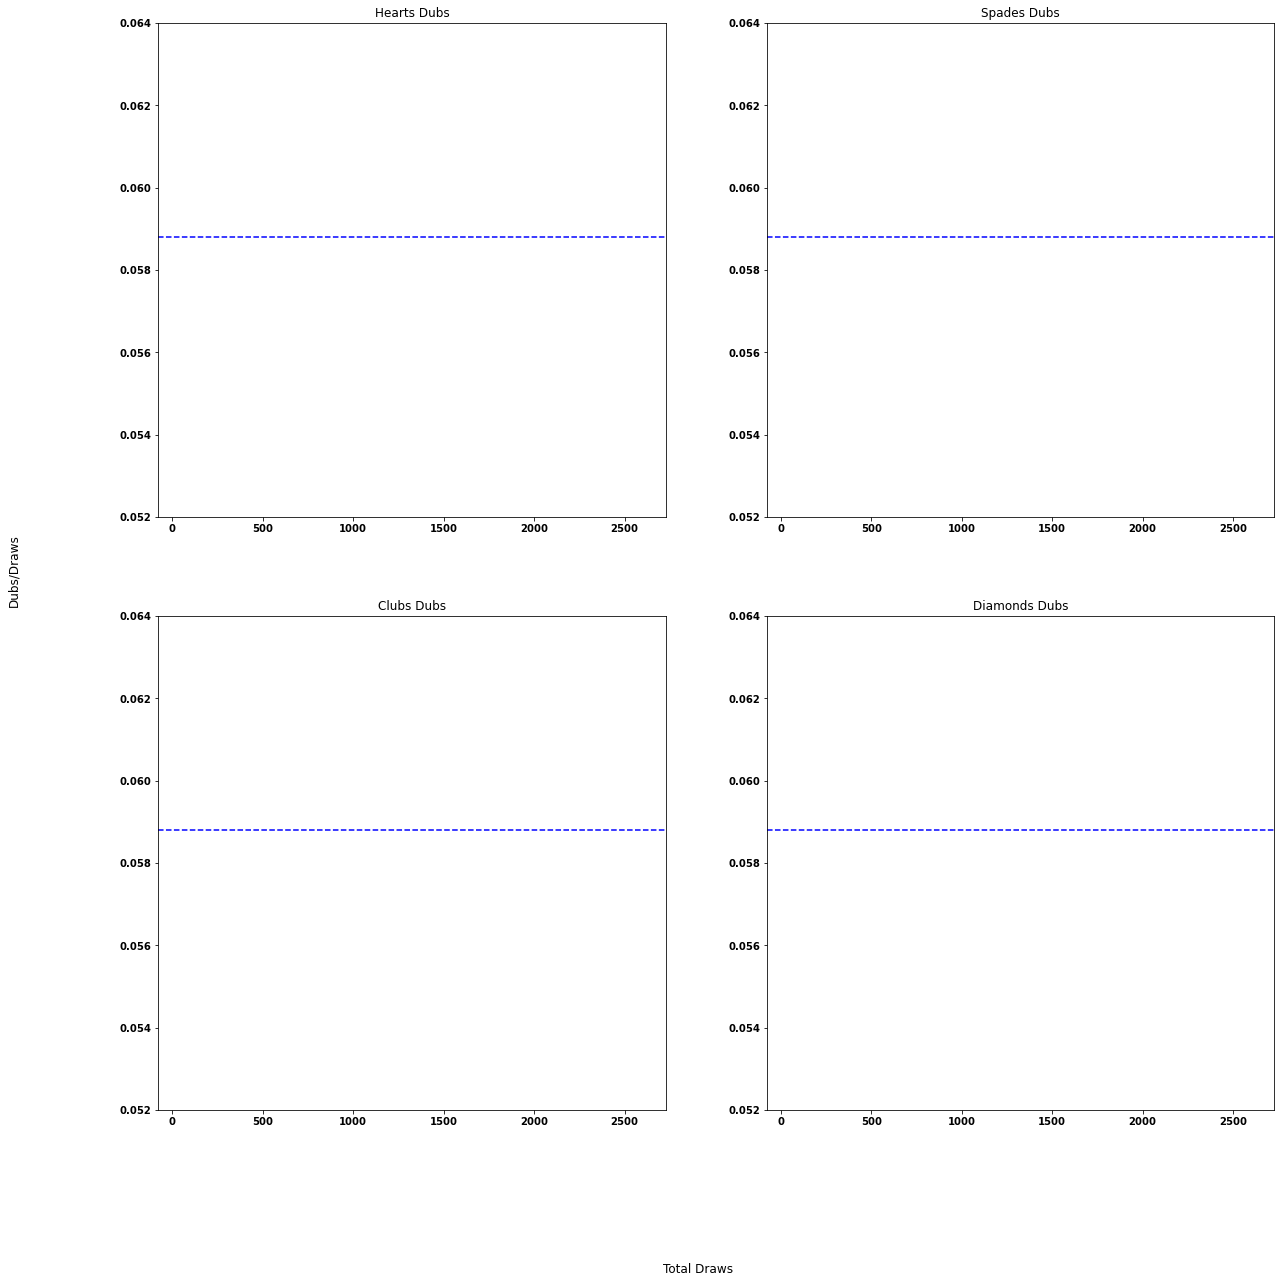

In [8]:
#the x axis
X = biggroup['Total_Draws'] 

#all the y axis stuff
Y1 = biggroup['Hearts_Dubs_Rate']
Y2 = biggroup['Spades_Dubs_Rate']
Y3 = biggroup['Clubs_Dubs_Rate']
Y4 = biggroup['Diamonds_Dubs_Rate']

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
  
#build & size
fig, axs = plt.subplots(2, 2, figsize=(20,20))
fig.supxlabel('Total Draws')
fig.supylabel('Dubs/Draws')

#hearts
axs[0, 0].plot(X, Y1, color='red')
axs[0, 0].set_title("Hearts Dubs")
axs[0, 0].axhline(0.0588, linestyle='--',color='blue')
axs[0, 0].set_ylim([.052,.064])

#spades
axs[0, 1].plot(X, Y2, color='black')
axs[0, 1].set_title("Spades Dubs")
axs[0, 1].axhline(0.0588, linestyle='--',color='blue')
axs[0, 1].set_ylim([.052,.064])

#clubs
axs[1, 0].plot(X, Y3,color='red')
axs[1, 0].set_title("Clubs Dubs")
axs[1, 0].axhline(0.0588, linestyle='--',color='blue')
axs[1, 0].set_ylim([.052,.064])

#diamonds
axs[1, 1].plot(X, Y4,color='black')
axs[1, 1].set_title("Diamonds Dubs")
axs[1, 1] .axhline(0.0588, linestyle='--',color='blue') 
axs[1, 1].set_ylim([.052,.064])

# Combine all the operations and display

plt.savefig('lines.png')
plt.show()

In [9]:
#x-axis stuff
X = biggroup['Total Draws'] 

#y-axis stuff
Y1 = biggroup['Hearts_Dubs_Rate']
Y2 = biggroup['Spades_Dubs_Rate']
Y3 = biggroup['Clubs_Dubs_Rate']
Y4 = biggroup['Diamonds_Dubs_Rate']

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
  
#build & size
fig, axs = plt.subplots(2, 2, figsize=(20,20))
fig.supxlabel('Total Draws')
fig.supylabel('Dubs/Draws')

#hearts
axs[0, 0].scatter(X, Y1, color='red')
axs[0, 0].set_title("Hearts Dubs")
axs[0, 0].axhline(0.0588, linestyle='--',color='blue')
axs[0, 0].set_ylim([.052,.064])

#spades
axs[0, 1].scatter(X, Y2, color='black')
axs[0, 1].set_title("Spades Dubs")
axs[0, 1].axhline(0.0588, linestyle='--',color='blue')
axs[0, 1].set_ylim([.052,.064])

#clubs
axs[1, 0].scatter(X, Y3,color='red')
axs[1, 0].set_title("Clubs Dubs")
axs[1, 0].axhline(0.0588, linestyle='--',color='blue')
axs[1, 0].set_ylim([.052,.064])

#diamonds
axs[1, 1].scatter(X, Y4,color='black')
axs[1, 1].set_title("Diamonds Dubs")
axs[1, 1] .axhline(0.0588, linestyle='--',color='blue') 
axs[1, 1].set_ylim([.052,.064])

# Combine all the operations and display

plt.savefig('scatter.png')
plt.show()

KeyError: 'Total Draws'